<a href="https://colab.research.google.com/github/chincholikarsalil/BE_project/blob/player_analysis/player_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# <center>Predictive Analytics of Football
---
#### <center> **Group no. 12**  
####<center>Salil Chincholikar, Niharika Sadul, Parth Thakkar, Ashutosh Amrutkar
####<center>Guide - Mr. Nikhil Dhavase
---
# <center>Player Analysis
---

###Initial steps

The dataset we are using for this part is from the data science community Kaggle https://www.kaggle.com/karangadiya/fifa19.
This dataset is used to perform exploratory data analysis of the football Players.

In [0]:
from google.colab import drive 
drive.mount('/mntDrive') 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [0]:
# reading the data

data = pd.read_csv('/content/drive/My Drive/google_colab/Datasets/Player/data.csv')
print(data.shape)

(18207, 89)


In [0]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [0]:
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [0]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [0]:
data.isnull().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

###Fill missing values

In [0]:
# filling the missing value for the continous variables for proper data visualizations

data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Weight'].fillna('200lbs', inplace = True)
data['Contract Valid Until'].fillna(2019, inplace = True)
data['Height'].fillna("5'11", inplace = True)
data['Loaned From'].fillna('None', inplace = True)
data['Joined'].fillna('Jul 1, 2018', inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Body Type'].fillna('Normal', inplace = True)
data['Position'].fillna('ST', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna(1, inplace = True)
data['Wage'].fillna('€200K', inplace = True)

data.rename(columns={'Club Logo':'Club_Logo'}, inplace=True)

In [0]:
data.fillna(0, inplace = True)

###Categorizing player attributes

In [0]:
def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [0]:
# adding these categories to the data

data['Defending'] = data.apply(defending, axis = 1)
data['General'] = data.apply(general, axis = 1)
data['Mental'] = data.apply(mental, axis = 1)
data['Passing'] = data.apply(passing, axis = 1)
data['Mobility'] = data.apply(mobility, axis = 1)
data['Power'] = data.apply(power, axis = 1)
data['Rating'] = data.apply(rating, axis = 1)
data['Shooting'] = data.apply(shooting, axis = 1)

Player Data

In [0]:
players = data[['Name','Defending','General','Mental','Passing',
                'Mobility','Power','Rating','Shooting','Flag','Age',
                'Nationality', 'Photo', 'Club_Logo', 'Club']]

players.head()

,Name,Defending,General,Mental,Passing,Mobility,Power,Rating,Shooting,Flag,Age,Nationality,Photo,Club_Logo,Club
0,L. Messi,29,89,71,87,91,74,94,88,https://cdn.sofifa.org/flags/52.png,31,Argentina,https://cdn.sofifa.org/players/4/19/158023.png,https://cdn.sofifa.org/teams/2/light/241.png,FC Barcelona
1,Cristiano Ronaldo,27,88,73,81,91,83,94,88,https://cdn.sofifa.org/flags/38.png,33,Portugal,https://cdn.sofifa.org/players/4/19/20801.png,https://cdn.sofifa.org/teams/2/light/45.png,Juventus
2,Neymar Jr,28,85,72,80,94,69,92,84,https://cdn.sofifa.org/flags/54.png,26,Brazil,https://cdn.sofifa.org/players/4/19/190871.png,https://cdn.sofifa.org/teams/2/light/73.png,Paris Saint-Germain
3,De Gea,16,26,43,39,66,54,92,21,https://cdn.sofifa.org/flags/45.png,27,Spain,https://cdn.sofifa.org/players/4/19/193080.png,https://cdn.sofifa.org/teams/2/light/11.png,Manchester United
4,K. De Bruyne,59,79,81,92,81,76,92,85,https://cdn.sofifa.org/flags/7.png,27,Belgium,https://cdn.sofifa.org/players/4/19/192985.png,https://cdn.sofifa.org/teams/2/light/10.png,Manchester City


In [0]:
players.columns

Index(['Name', 'Defending', 'General', 'Mental', 'Passing', 'Mobility',
       'Power', 'Rating', 'Shooting', 'Flag', 'Age', 'Nationality', 'Photo',
       'Club_Logo', 'Club'],
      dtype='object')

###Player ScoreCard

In [0]:
import requests
import random
from math import pi

import matplotlib.image as mpimg
from matplotlib.offsetbox import (OffsetImage,AnnotationBbox)

#####Kaggle Kernel


In [0]:
def details(row, title, image, age, nationality, photo, logo, club):
    
    flag_image = "img_flag.jpg"
    player_image = "img_player.jpg"
    logo_image = "img_club_logo.jpg"
        
    img_flag = requests.get(image).content
    with open(flag_image, 'wb') as handler:
        handler.write(img_flag)
    
    player_img = requests.get(photo).content
    with open(player_image, 'wb') as handler:
        handler.write(player_img)
     
    logo_img = requests.get(logo).content
    with open(logo_image, 'wb') as handler:
        handler.write(logo_img)
    
    r = lambda: random.randint(0,255)
    colorRandom = '#%02X%02X%02X' % (r(),r(),r())
    
    if colorRandom == '#ffffff':colorRandom = '#a5d6a7'
    
    basic_color = '#37474f'
    color_annotate = '#01579b'
    
    img = mpimg.imread(flag_image)
    
    plt.figure(figsize=(15,8))
    categories=list(players)[1:]
    coulumnDontUseGraph = ['Flag', 'Age', 'Nationality', 'Photo', 'Logo', 'Club']
    N = len(categories) - len(coulumnDontUseGraph)
    
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(111, projection='polar')
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories, color= 'black', size=17)
    ax.set_rlabel_position(0)
    plt.yticks([0,25,50,75,100], ["0","25","50","75","100"], color= basic_color, size= 10)
    plt.ylim(0,100)
    
    
    values = players.loc[row].drop('Name').values.flatten().tolist() 
    valuesDontUseGraph = [image, age, nationality, photo, logo, club]
    values = [e for e in values if e not in (valuesDontUseGraph)]
    values += values[:1]
    
    
    ax.plot(angles, values, color = basic_color, linewidth=1, linestyle='solid')
    ax.fill(angles, values, color = colorRandom, alpha=0.5)
    axes_coords = [0, 0, 1, 1]
    ax_image = plt.gcf().add_axes(axes_coords,zorder= -1)
    ax_image.imshow(img,alpha=0.5)
    ax_image.axis('off')
    
    ax.annotate('Nationality: ' + nationality.upper(), xy=(10,10), xytext=(103, 138),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
                      
    ax.annotate('Age: ' + str(age), xy=(10,10), xytext=(43, 180),
                fontsize= 15,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
    
    ax.annotate('Team: ' + club.upper(), xy=(10,10), xytext=(92, 168),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})

    arr_img_player = plt.imread(player_image, format='jpg')

    imagebox_player = OffsetImage(arr_img_player)
    imagebox_player.image.axes = ax
    abPlayer = AnnotationBbox(imagebox_player, (0.5, 0.7),
                        xybox=(303, 233),
                        xycoords='data',
                        boxcoords="offset points"
                        )
    arr_img_logo = plt.imread(logo_image, format='jpg')

    imagebox_logo = OffsetImage(arr_img_logo)
    imagebox_logo.image.axes = ax
    abLogo = AnnotationBbox(imagebox_logo, (0.5, 0.7),
                        xybox=(-343, -236),
                        xycoords='data',
                        boxcoords="offset points"
                        )

    ax.add_artist(abPlayer)
    ax.add_artist(abLogo)

    plt.title(title, size=40, color= basic_color)

#### Defining a ScoreCard

In [0]:
def ScoreCard(id = 0):
    if 0 <= id < len(data.ID):
        details(row = players.index[id], 
                title = players['Name'][id], 
                age = players['Age'][id], 
                photo = players['Photo'][id],
                nationality = players['Nationality'][id],
                image = players['Flag'][id], 
                logo = players['Club_Logo'][id], 
                club = players['Club'][id])
    else:
        print('Index out of Range!')

####ScoreCard Outputs

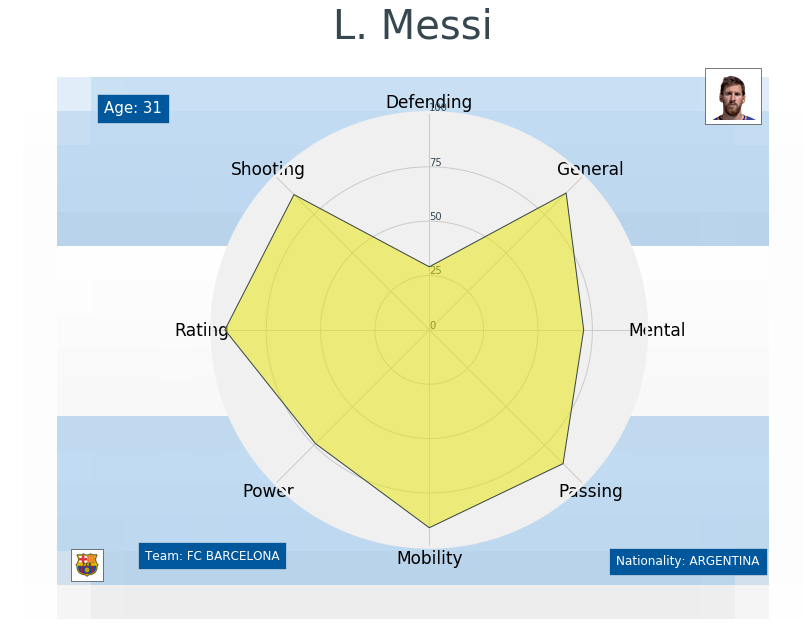

In [0]:
ScoreCard(0)

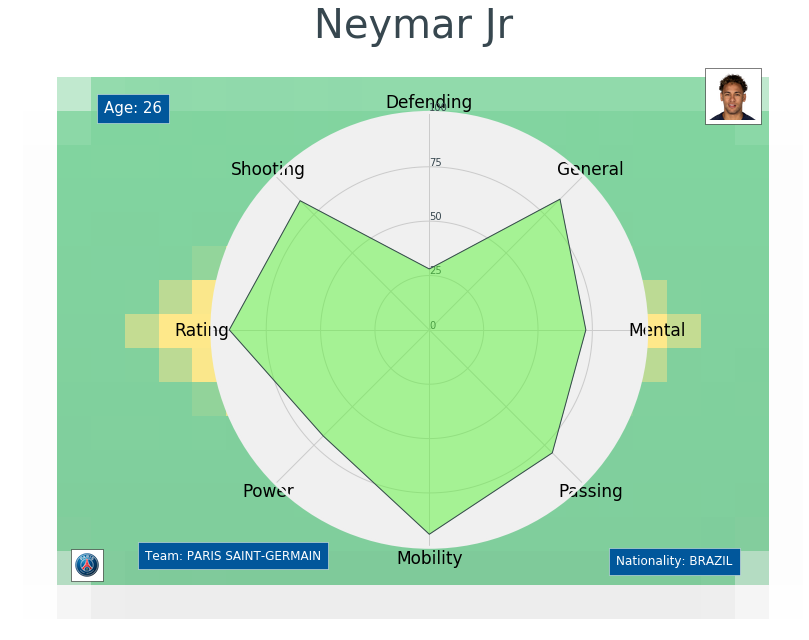

In [0]:
ScoreCard(2)

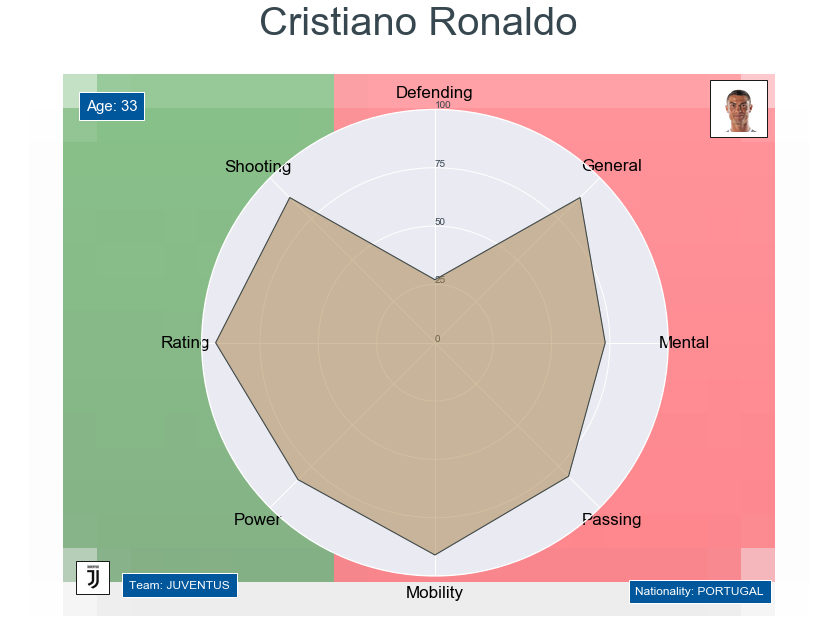

In [0]:
ScoreCard(1)

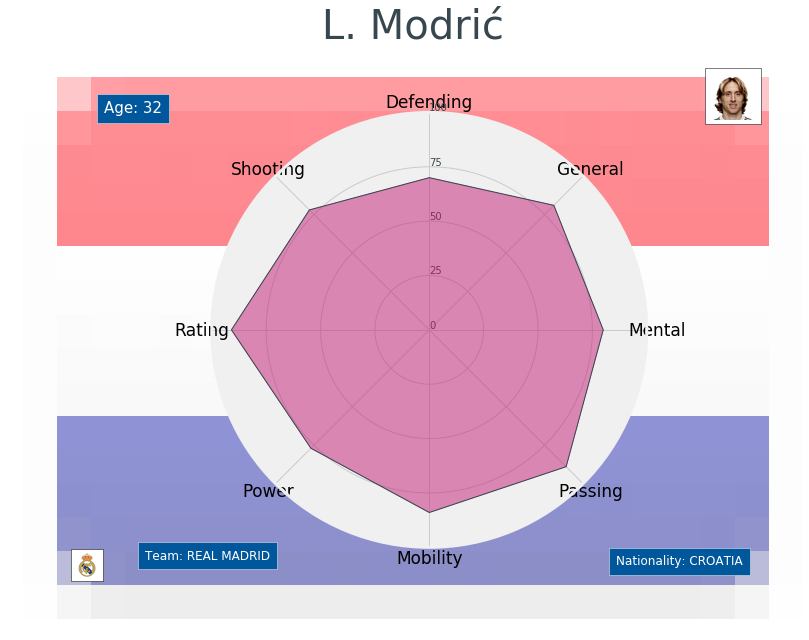

In [0]:
ScoreCard(6)

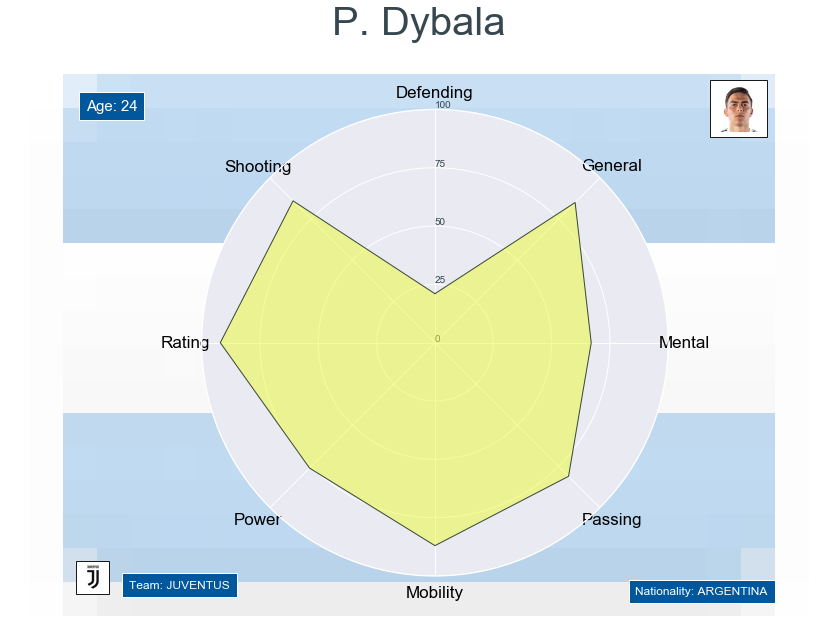

In [0]:
ScoreCard(15)

###Various Analysis

####Preferred foot comparison


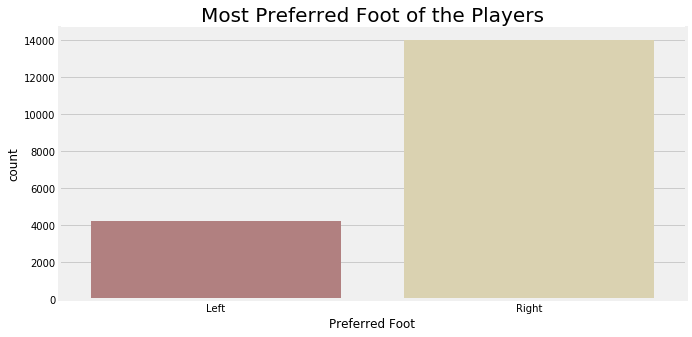

In [0]:
# comparison of preferred foot for different players

plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data['Preferred Foot'], palette = 'pink')
plt.title('Most Preferred Foot of the Players', fontsize = 20)
plt.show()

####Player position comparison 

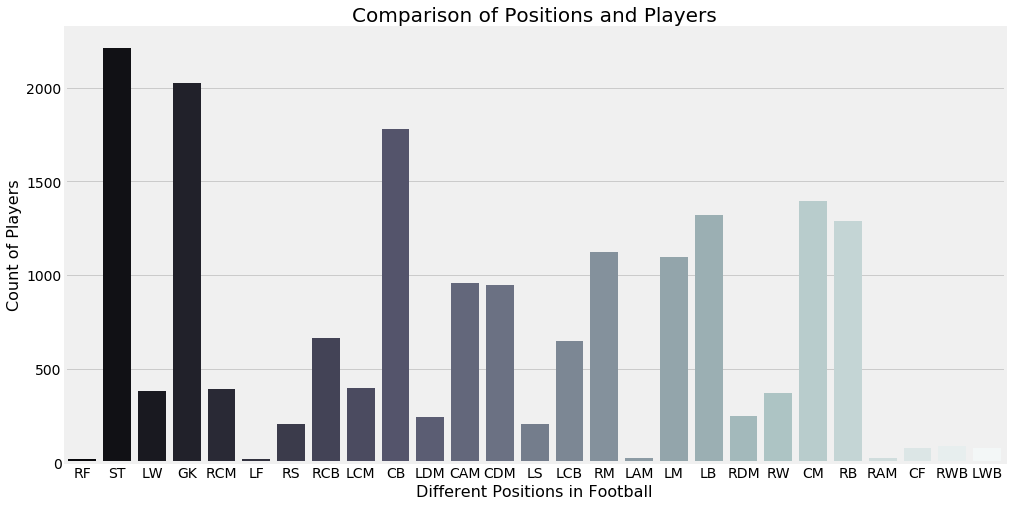

In [0]:
# different positions acquired by the players 

plt.figure(figsize = (15, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Position', data = data, palette = 'bone')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

####Player Age comparison

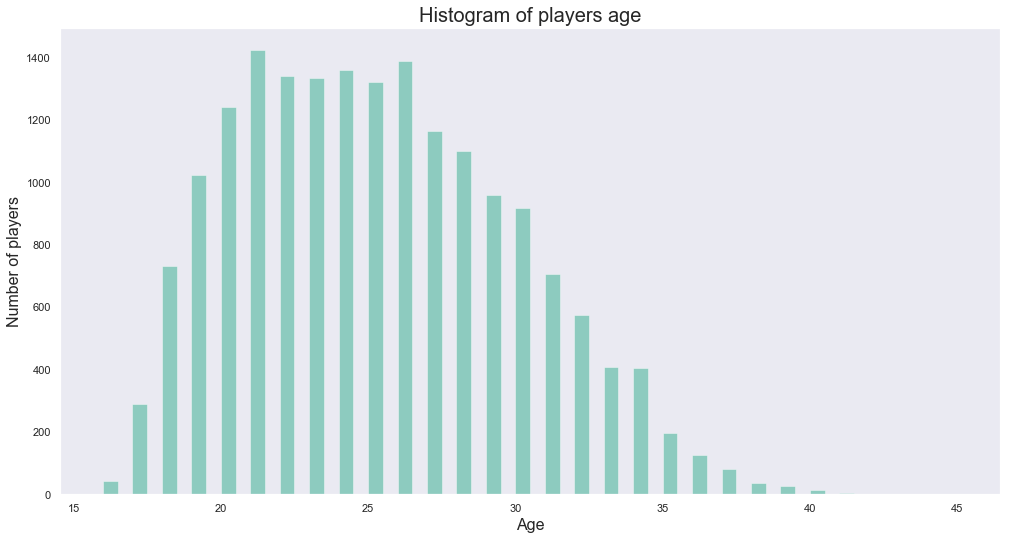

In [0]:
# Histogram: Players with same Age

sns.set(style = "dark", palette = "colorblind", color_codes = True)
x = data.Age
plt.figure(figsize = (15,8))
ax = sns.distplot(x, bins = 58, kde = False, color = 'g')
ax.set_xlabel(xlabel = "Age", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players age', fontsize = 20)
plt.show()

####Best players

#####Based on Overall Scores

In [0]:
# best players for each position with their Age, Club, and Nationality based on their overall scores

data.iloc[data.groupby(data['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality']]

,Position,Name,Age,Club,Nationality
17,CAM,A. Griezmann,27,Atlético Madrid,France
12,CB,D. Godín,32,Atlético Madrid,Uruguay
20,CDM,Sergio Busquets,29,FC Barcelona,Spain
271,CF,Luis Alberto,25,Lazio,Spain
67,CM,Thiago,27,FC Bayern München,Spain
3,GK,De Gea,27,Manchester United,Spain
28,LAM,J. Rodríguez,26,FC Bayern München,Colombia
35,LB,Marcelo,30,Real Madrid,Brazil
24,LCB,G. Chiellini,33,Juventus,Italy
11,LCM,T. Kroos,28,Real Madrid,Germany


#####Based on Potential

In [0]:
# best players for each position with their Age, Club, and Nationality based on their Potential

data.iloc[data.groupby(data['Position'])['Potential'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality']]

,Position,Name,Age,Club,Nationality
31,CAM,C. Eriksen,26,Tottenham Hotspur,Denmark
42,CB,S. Umtiti,24,FC Barcelona,France
27,CDM,Casemiro,26,Real Madrid,Brazil
350,CF,A. Milik,24,Napoli,Poland
78,CM,S. Milinković-Savić,23,Lazio,Serbia
3,GK,De Gea,27,Manchester United,Spain
28,LAM,J. Rodríguez,26,FC Bayern München,Colombia
35,LB,Marcelo,30,Real Madrid,Brazil
77,LCB,M. Škriniar,23,Inter,Slovakia
11,LCM,T. Kroos,28,Real Madrid,Germany


###Top in the list

In [0]:
# defining the features of players

player_features = ('Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Composure', 
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 
                   'LongPassing', 'LongShots', 'Marking', 'Penalties')

In [0]:
# Top four features for every position

for i, val in data.groupby(data['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))

Position CAM: Balance, Agility, Acceleration, BallControl
Position CB: Jumping, Aggression, HeadingAccuracy, Marking
Position CDM: Aggression, Jumping, Balance, BallControl
Position CF: Agility, Balance, Acceleration, Dribbling
Position CM: Balance, Agility, Acceleration, BallControl
Position GK: GKReflexes, GKDiving, GKPositioning, GKHandling
Position LAM: Agility, Balance, Acceleration, Dribbling
Position LB: Acceleration, Balance, Agility, Jumping
Position LCB: Jumping, Aggression, HeadingAccuracy, Marking
Position LCM: Balance, Agility, BallControl, LongPassing
Position LDM: Aggression, BallControl, LongPassing, Balance
Position LF: Balance, Agility, Acceleration, Dribbling
Position LM: Acceleration, Agility, Balance, Dribbling
Position LS: Acceleration, Agility, Finishing, Jumping
Position LW: Acceleration, Agility, Balance, Dribbling
Position LWB: Acceleration, Agility, Balance, Jumping
Position RAM: Agility, Balance, Acceleration, Dribbling
Position RB: Acceleration, Balance, Ju

In [0]:
# Best in every category

i=0
while i < len(player_features):
    print('Best {0}:  {1}'.format(player_features[i],data.loc[data[player_features[i]].idxmax()][2]))
    i += 1

Best Acceleration:  Douglas Costa
Best Aggression:  B. Pearson
Best Agility:  Neymar Jr
Best Balance:  Bernard
Best BallControl:  L. Messi
Best Composure:  L. Messi
Best Crossing:  K. De Bruyne
Best Dribbling:  L. Messi
Best FKAccuracy:  L. Messi
Best Finishing:  L. Messi
Best GKDiving:  De Gea
Best GKHandling:  J. Oblak
Best GKKicking:  M. Neuer
Best GKPositioning:  G. Buffon
Best GKReflexes:  De Gea
Best HeadingAccuracy:  Naldo
Best Interceptions:  N. Kanté
Best Jumping:  Cristiano Ronaldo
Best LongPassing:  T. Kroos
Best LongShots:  L. Messi
Best Marking:  A. Barzagli
Best Penalties:  M. Balotelli


In [0]:
# Top 10 left footers

data[data['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club', 'Nationality']].head(10)

,Name,Age,Club,Nationality
0,L. Messi,31,FC Barcelona,Argentina
13,David Silva,32,Manchester City,Spain
15,P. Dybala,24,Juventus,Argentina
17,A. Griezmann,27,Atlético Madrid,France
19,T. Courtois,26,Real Madrid,Belgium
24,G. Chiellini,33,Juventus,Italy
26,M. Salah,26,Liverpool,Egypt
28,J. Rodríguez,26,FC Bayern München,Colombia
35,Marcelo,30,Real Madrid,Brazil
36,G. Bale,28,Real Madrid,Wales


In [0]:
# Top 10 Right footers

data[data['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club', 'Nationality']].head(10)

,Name,Age,Club,Nationality
1,Cristiano Ronaldo,33,Juventus,Portugal
2,Neymar Jr,26,Paris Saint-Germain,Brazil
3,De Gea,27,Manchester United,Spain
4,K. De Bruyne,27,Manchester City,Belgium
5,E. Hazard,27,Chelsea,Belgium
6,L. Modrić,32,Real Madrid,Croatia
7,L. Suárez,31,FC Barcelona,Uruguay
8,Sergio Ramos,32,Real Madrid,Spain
9,J. Oblak,25,Atlético Madrid,Slovenia
10,R. Lewandowski,29,FC Bayern München,Poland


In [0]:
# Top 5 Qualities of the Club

def Club_top_5_qualities(_):
    for i, val in data.groupby(data['Club'])[player_features].mean().iterrows():
        if i == _:
            return('{}: {}, {}, {}, {}, {} '.format(i, *tuple(val.nlargest(5).index)))
            
print(Club_top_5_qualities("FC Barcelona"))
print(Club_top_5_qualities("Real Madrid"))
print(Club_top_5_qualities(data.Club[2]))

FC Barcelona: Composure, BallControl, Balance, Agility, Acceleration 
Real Madrid: Composure, Acceleration, Balance, BallControl, Agility 
Paris Saint-Germain: Agility, Acceleration, Composure, BallControl, Balance 
